In [245]:
#Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import randn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# load the datasets
players = pd.read_csv('CollegeBasketballPlayers2009-2021.csv', low_memory=False)
cbb = pd.read_csv('cbb.csv')

In [246]:
print(players)
print(cbb)

              player_name              team  conf  GP  Min_per   Ortg   usg  \
0           DeAndrae Ross     South Alabama    SB  26     29.5   97.3  16.6   
1           Pooh Williams          Utah St.   WAC  34     60.9  108.3  14.9   
2           Jesus Verdejo     South Florida    BE  27     72.0   96.2  21.8   
3         Mike Hornbuckle        Pepperdine   WCC  30     44.5   97.7  16.0   
4           Anthony Brown           Pacific    BW  33     56.2   96.5  22.0   
...                   ...               ...   ...  ..      ...    ...   ...   
61056      Trey Patterson         Villanova    BE   2      0.3   60.5  19.3   
61057  Stavros Polatoglou  Northwestern St.  Slnd   4      1.3   28.3   7.1   
61058          Sandy Ryan            Tulane  Amer   1      0.1    0.0   0.0   
61059           Ty Larson        Texas Tech   B12   1      0.1    0.0   0.0   
61060         Jaden Jones           Rutgers   B10   4      1.0   89.6  28.8   

        eFG  TS_per  ORB_per  ...      dgbpm    ore

In [247]:
#for grouping
df = players.rename(columns={'team': 'TEAM'}, inplace=True)
print(players)

              player_name              TEAM  conf  GP  Min_per   Ortg   usg  \
0           DeAndrae Ross     South Alabama    SB  26     29.5   97.3  16.6   
1           Pooh Williams          Utah St.   WAC  34     60.9  108.3  14.9   
2           Jesus Verdejo     South Florida    BE  27     72.0   96.2  21.8   
3         Mike Hornbuckle        Pepperdine   WCC  30     44.5   97.7  16.0   
4           Anthony Brown           Pacific    BW  33     56.2   96.5  22.0   
...                   ...               ...   ...  ..      ...    ...   ...   
61056      Trey Patterson         Villanova    BE   2      0.3   60.5  19.3   
61057  Stavros Polatoglou  Northwestern St.  Slnd   4      1.3   28.3   7.1   
61058          Sandy Ryan            Tulane  Amer   1      0.1    0.0   0.0   
61059           Ty Larson        Texas Tech   B12   1      0.1    0.0   0.0   
61060         Jaden Jones           Rutgers   B10   4      1.0   89.6  28.8   

        eFG  TS_per  ORB_per  ...      dgbpm    ore

In [248]:
#for grouping
df = players.rename(columns={'year': 'YEAR'}, inplace=True)
print(players)

              player_name              TEAM  conf  GP  Min_per   Ortg   usg  \
0           DeAndrae Ross     South Alabama    SB  26     29.5   97.3  16.6   
1           Pooh Williams          Utah St.   WAC  34     60.9  108.3  14.9   
2           Jesus Verdejo     South Florida    BE  27     72.0   96.2  21.8   
3         Mike Hornbuckle        Pepperdine   WCC  30     44.5   97.7  16.0   
4           Anthony Brown           Pacific    BW  33     56.2   96.5  22.0   
...                   ...               ...   ...  ..      ...    ...   ...   
61056      Trey Patterson         Villanova    BE   2      0.3   60.5  19.3   
61057  Stavros Polatoglou  Northwestern St.  Slnd   4      1.3   28.3   7.1   
61058          Sandy Ryan            Tulane  Amer   1      0.1    0.0   0.0   
61059           Ty Larson        Texas Tech   B12   1      0.1    0.0   0.0   
61060         Jaden Jones           Rutgers   B10   4      1.0   89.6  28.8   

        eFG  TS_per  ORB_per  ...      dgbpm    ore

In [249]:
# Merge the two datasets
merged_data = pd.merge(players, cbb, on='TEAM', how='inner')
print(merged_data.shape)

(424346, 89)


In [250]:
# Groupby class and count number of players
class_counts = merged_data.groupby('yr')['player_name'].count()
print(class_counts)
#I guess in the big dataset, some are filled as 42.9, 57.1, None since they had no entry in the dataset instead of their class. Tried dropping those rows below.

yr
0           35
42.9         7
57.1         7
Fr      112718
Jr      112855
None       140
So      100697
Sr       95972
Name: player_name, dtype: int64


In [251]:
class_counts.drop(['None'])
print(class_counts)
#just wont drop, cant figure this part out. Will just look past it for the sake of the presentation

yr
0           35
42.9         7
57.1         7
Fr      112718
Jr      112855
None       140
So      100697
Sr       95972
Name: player_name, dtype: int64


In [252]:
# Groupby conference and calculate Adjusted Offensive/Defensive Efficiency
conf_stats = merged_data.groupby('conf')[['ADJOE', 'ADJDE']].mean()
print(conf_stats)

           ADJOE       ADJDE
conf                        
A10   105.711554  100.468772
ACC   111.794324   96.171152
AE     98.395722  105.702783
ASun  100.901523  107.665660
Amer  106.393804   98.957369
B10   111.434756   95.824953
B12   111.748057   95.606866
BE    110.300000   96.893254
BSky  101.200359  108.672887
BSth  100.082251  107.750422
BW    101.144421  104.498954
CAA   103.874532  104.753410
CUSA  102.584437  102.916865
GWC    97.312213  107.993342
Horz  102.306195  104.350072
Ind    98.414286  105.628571
Ivy   102.131171  103.451450
MAAC  100.713345  105.181064
MAC   103.271669  103.202415
MEAC   94.089464  109.603492
MVC   104.192925  100.377447
MWC   105.283505  100.786704
NEC    98.544839  108.153972
OVC   101.404046  106.900897
P10   109.044613   98.665783
P12   109.083306   98.320076
Pat   100.535706  105.657851
SB    101.520632  104.240836
SC    101.761235  106.553705
SEC   109.447829   96.800344
SWAC   93.052914  109.832897
Slnd   98.516611  107.955454
Sum   102.6221

In [253]:
# I wanted to do a Groupby of the teams to their respective conference so I could do analysis on conference (the teams in it)'s wins to the other stats like ppg, defensive ratings, etc. but as you can see it didn't pan out so it can be disregarded.
conf_stats = merged_data.groupby('conf')[['TEAM']].mean()
print(conf_stats)

Empty DataFrame
Columns: []
Index: [A10, ACC, AE, ASun, Amer, B10, B12, BE, BSky, BSth, BW, CAA, CUSA, GWC, Horz, Ind, Ivy, MAAC, MAC, MEAC, MVC, MWC, NEC, OVC, P10, P12, Pat, SB, SC, SEC, SWAC, Slnd, Sum, WAC, WCC, ind]


C:\Users\allst\AppData\Local\Temp\ipykernel_22384\3732559622.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  conf_stats = merged_data.groupby('conf')[['TEAM']].mean()


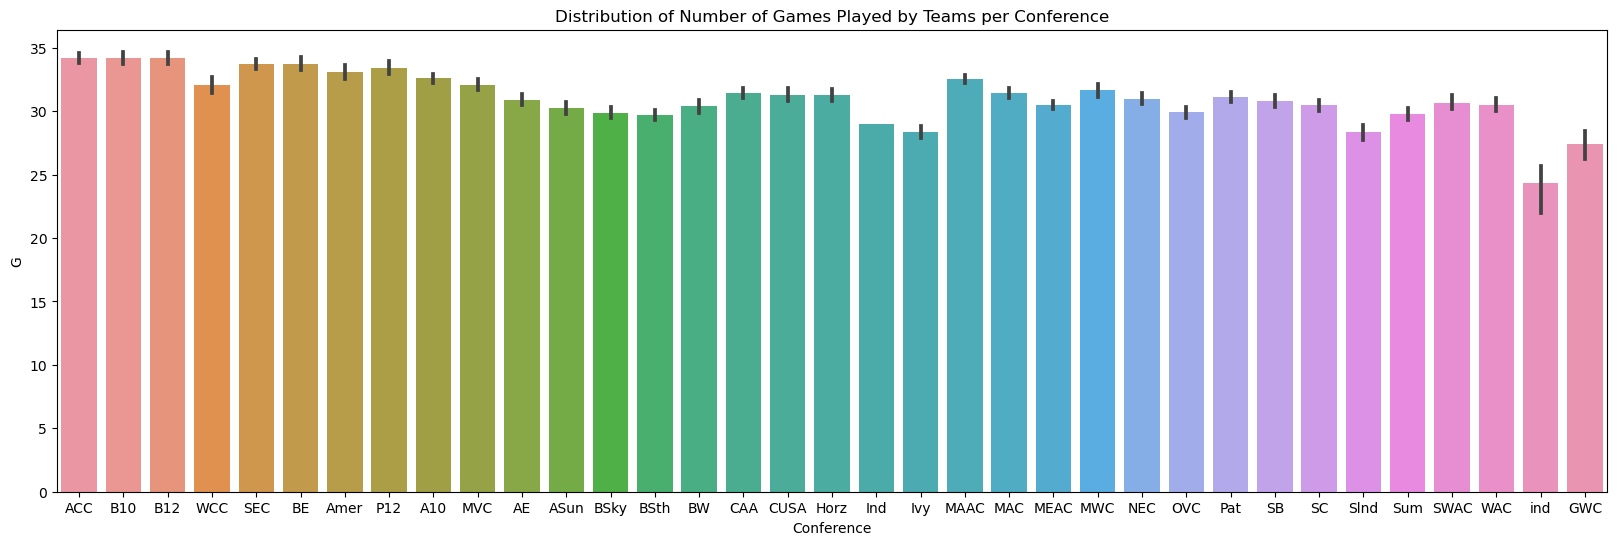

In [254]:
#1
# What I wanted to do here was compare the amount of games played by teams per conference just to see how that affects the other data 
#ie. every team didn't play the same number of games so the stats may be weighed a little different
plt.figure(figsize=(20,6))
sns.barplot(data=cbb,x="CONF", y="G")
plt.xlabel('Games Playes')
plt.xlabel('Conference')
plt.title('Distribution of Number of Games Played by Teams per Conference')
plt.show()

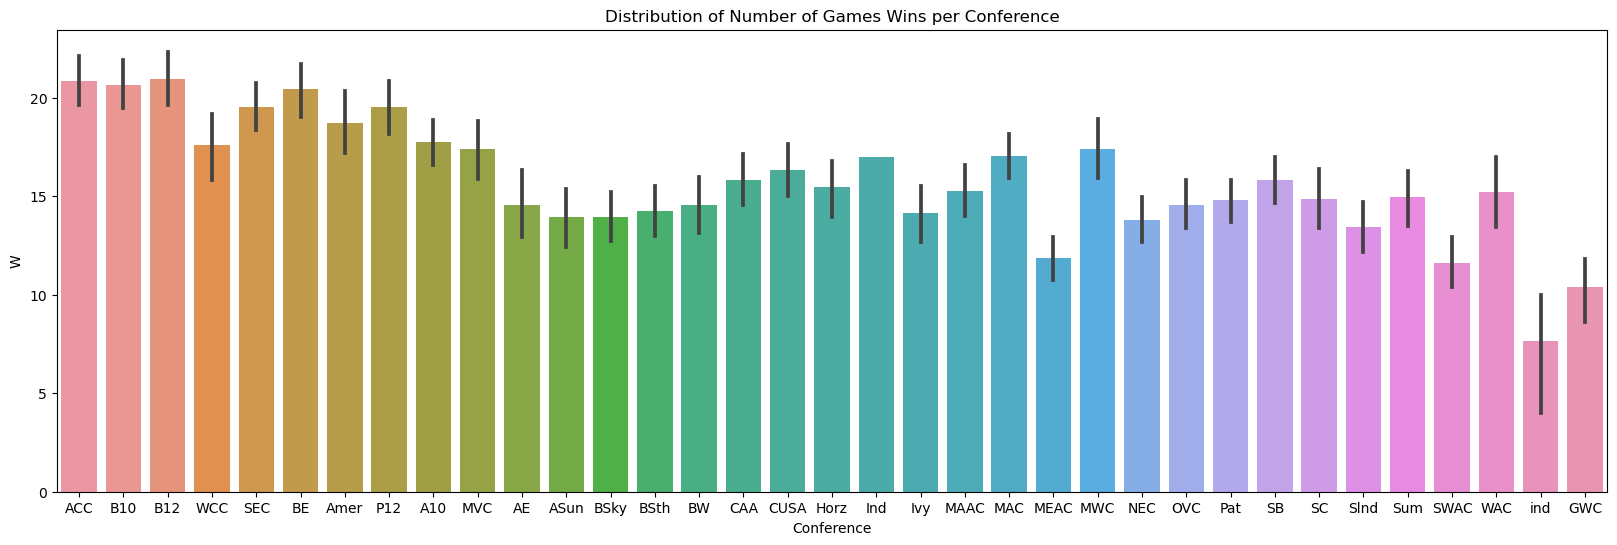

In [255]:
#2
# Wanted to see the Wins per conference
plt.figure(figsize=(20,6))
sns.barplot(data=cbb,x="CONF", y="W")
plt.xlabel('Conference')
plt.title('Distribution of Number of Games Wins per Conference')
plt.show()

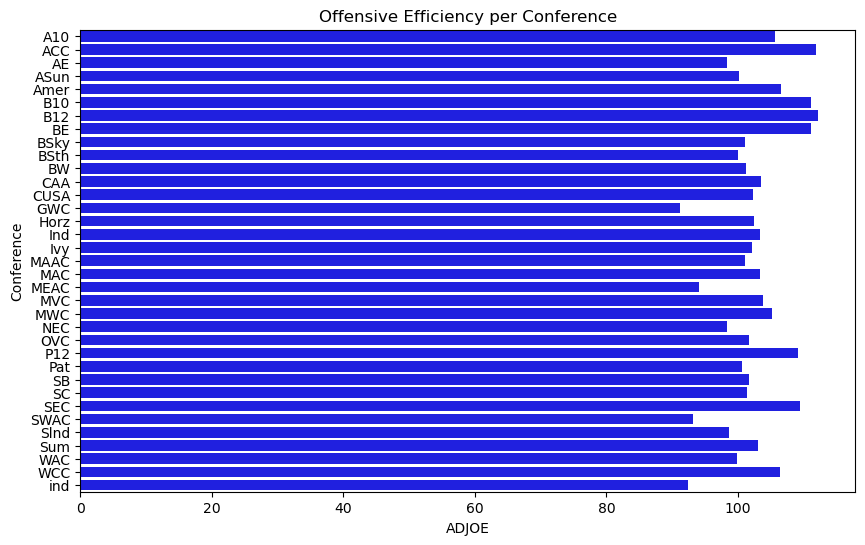

In [256]:
#3
#Showing the offensive efficiency per conference
efficiencyO = cbb.groupby('CONF')['ADJOE'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=efficiencyO.values, y=efficiencyO.index, color='blue')
plt.xlabel('ADJOE')
plt.ylabel('Conference')
plt.title('Offensive Efficiency per Conference')
plt.show()

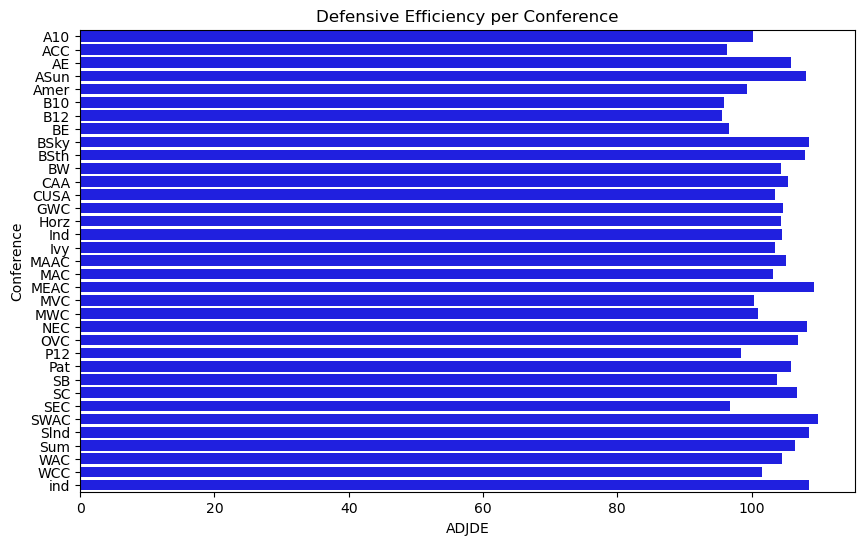

In [257]:
#4
#line that up the defensive efficiency
efficiencyD = cbb.groupby('CONF')['ADJDE'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=efficiencyD.values, y=efficiencyD.index, color='blue')
plt.xlabel('ADJDE')
plt.ylabel('Conference')
plt.title('Defensive Efficiency per Conference')
plt.show()

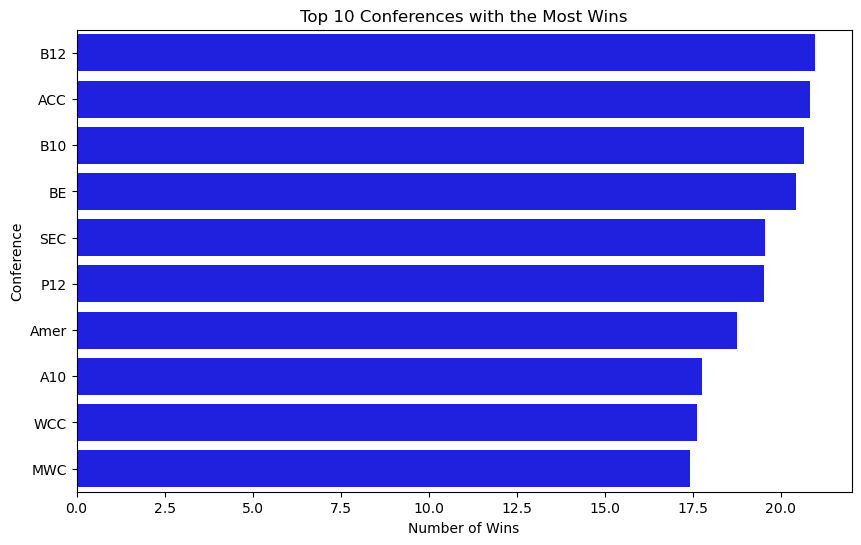

In [267]:
#5
#This was showing the wins by each team in each conference
top10_wins = cbb.groupby('CONF')['W'].mean().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10_wins.values, y=top10_wins.index, color='blue')
plt.xlabel('Number of Wins')
plt.ylabel('Conference')
plt.title('Top 10 Conferences with the Most Wins')
plt.show()


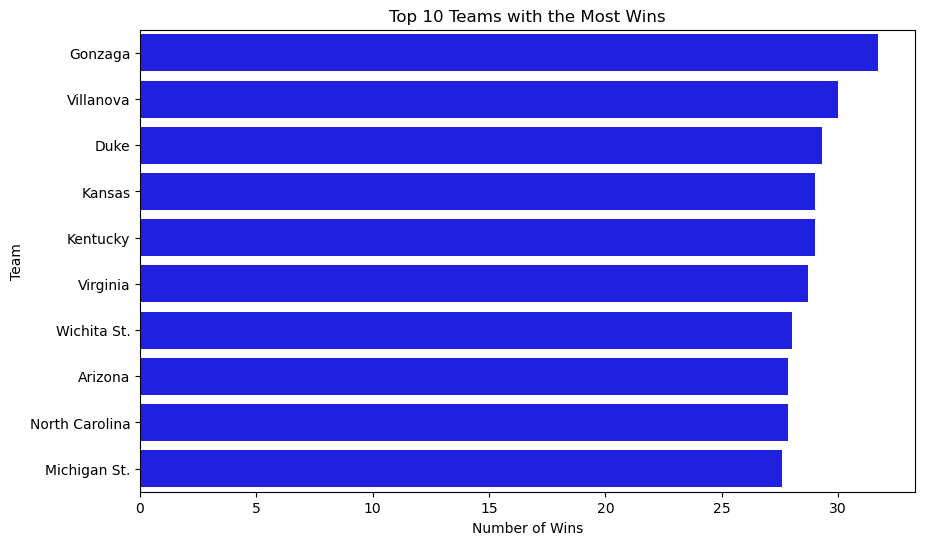

In [259]:
#6
#Top10 wins per conference
top10_wins = cbb.groupby('TEAM')['W'].mean().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10_wins.values, y=top10_wins.index, color='blue')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.title('Top 10 Teams with the Most Wins')
plt.show()

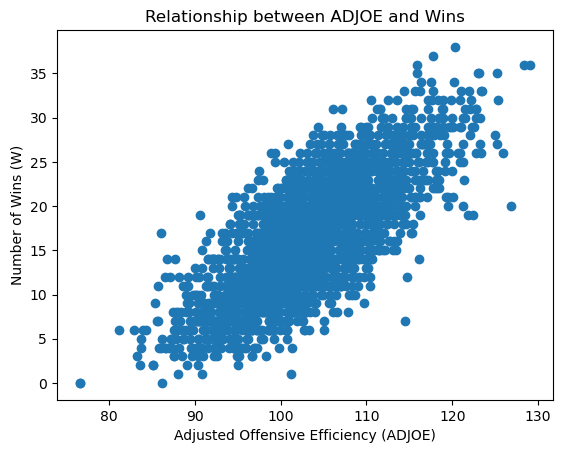

In [260]:
# I created the scatter plot showing the relationship between ADJOE and Wins to see if it correlated which it does
plt.scatter(cbb["ADJOE"], cbb["W"])
plt.xlabel("Adjusted Offensive Efficiency (ADJOE)")
plt.ylabel("Number of Wins (W)")
plt.title("Relationship between ADJOE and Wins")
plt.show()

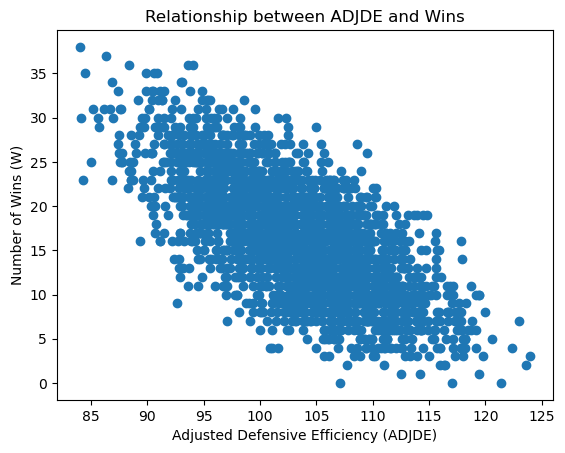

In [261]:
# I then made the same scatterplot to see if it correlated with defense to wins... it did thumbs up
plt.scatter(cbb["ADJDE"], cbb["W"])
plt.xlabel("Adjusted Defensive Efficiency (ADJDE)")
plt.ylabel("Number of Wins (W)")
plt.title("Relationship between ADJDE and Wins")
plt.show()

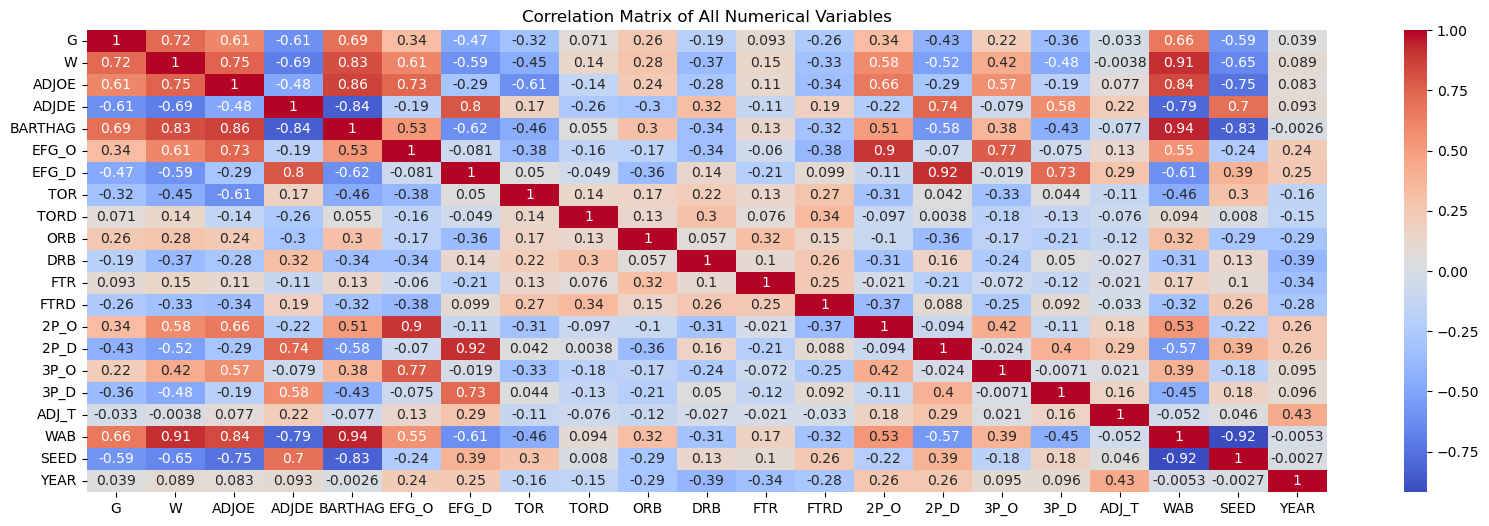

In [262]:
#heatmap of all statistical variable
plt.figure(figsize=(20,6))
sns.heatmap(cbb.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of All Numerical Variables')
plt.show()

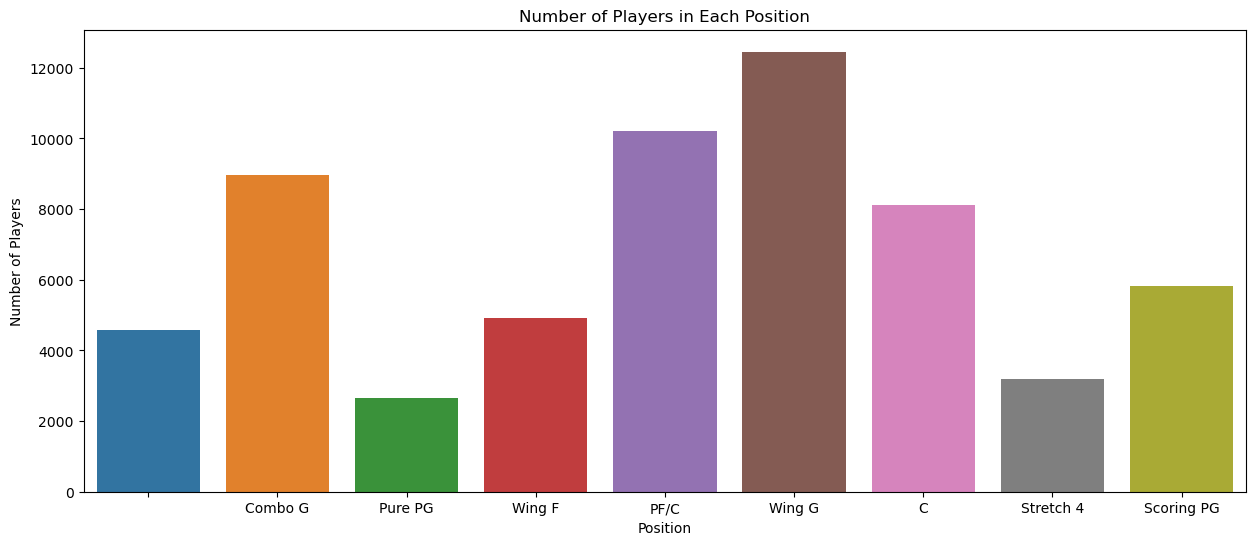

In [263]:
# Bar chart of the number of players in each position
plt.figure(figsize=(15,6))
sns.countplot(data=players, x="position")
plt.title("Number of Players in Each Position")
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.show()

In [275]:
# forest regression ML model (or an attempt at) of predicting the points of players by their class, position, and their team. 

X = players[['blk', 'position', 'TEAM']].values
y = players['pts'].values

X = pd.get_dummies(X, columns=['pts'])

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#I couldnt figure out issue to it being 1D, everything on the internet told me my imports were wrong and I put each one of them in still to no avail.

AttributeError: 'DataFrame' object has no attribute 'get_dummies'

In [266]:
# fit the random forest model to the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# evaluate the model on the testing data
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

ValueError: could not convert string to float: 'CUSA'

In [268]:
print('Mean Squared Error:', mse)
print('R-squared:', r2)

NameError: name 'mse' is not defined